In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df_j23 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [3]:
df_j23.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


# Q1: Read the data for January. How many columns are there?

In [4]:
print(df_j23.shape)

print(f"There are {df_j23.shape[1]} columns in the dataset for January 2024.")

(3066766, 19)
There are 19 columns in the dataset for January 2024.


'''
Q2:
Now let's compute the duration variable. It should contain the duration of a ride in minutes.
What's the standard deviation of the trips duration in January?
'''

In [5]:
df_j23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [6]:
df_j23[["tpep_pickup_datetime", "tpep_dropoff_datetime"]].head()

,tpep_pickup_datetime,tpep_dropoff_datetime
0,2023-01-01 00:32:10,2023-01-01 00:40:36
1,2023-01-01 00:55:08,2023-01-01 01:01:27
2,2023-01-01 00:25:04,2023-01-01 00:37:49
3,2023-01-01 00:03:48,2023-01-01 00:13:25
4,2023-01-01 00:10:29,2023-01-01 00:21:19


In [7]:
df_j23['duration'] = ((df_j23['tpep_dropoff_datetime'] - df_j23['tpep_pickup_datetime'])/np.timedelta64(1,'m')).round(2)

In [8]:
df_j23[["tpep_pickup_datetime", "tpep_dropoff_datetime", "duration"]].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,duration
0,2023-01-01 00:32:10,2023-01-01 00:40:36,8.43
1,2023-01-01 00:55:08,2023-01-01 01:01:27,6.32
2,2023-01-01 00:25:04,2023-01-01 00:37:49,12.75
3,2023-01-01 00:03:48,2023-01-01 00:13:25,9.62
4,2023-01-01 00:10:29,2023-01-01 00:21:19,10.83


In [9]:
j24_std = round(df_j23["duration"].std(), 2)
print(f"The standard deviation of the trips duration in January 2024 is: {j24_std}")

The standard deviation of the trips duration in January 2024 is: 42.59


'''
Q3. Dropping outliers
Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?
'''

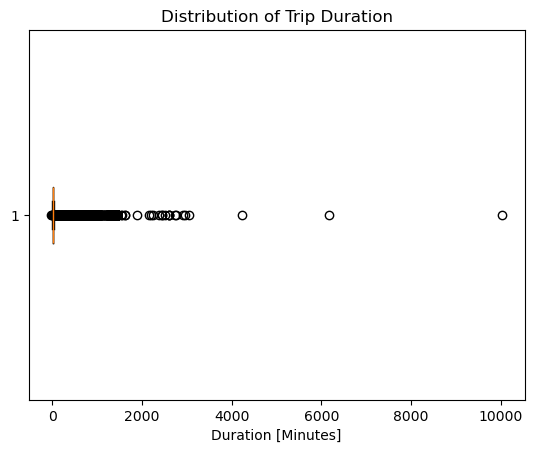

In [10]:
#create boxplot
plt.boxplot(df_j23["duration"], vert = False)
plt.xlabel("Duration [Minutes]")
plt.title("Distribution of Trip Duration")

plt.show()

In [11]:
#subset "duration" between 1 and 60 (inclusive) to remove outliers
#get the range
low, high = [1, 60]
#set a mask to subset the data 
mask_duration = df_j23["duration"].between(low, high, "both")
#apply the subset mask
df_j23_filtered = df_j23[mask_duration]
len(df_j23_filtered)

3009173

In [12]:
# filtered_df_j23 = df_j23.loc[(df_j23["duration"] > 0.99) & (df_j23["duration"] < 61)]
# len(filtered_df_j23)

In [13]:
fraction = round(len(df_j23_filtered) / len(df_j23["duration"]) * 100)
print(f"The fraction of the records left after dropping the outliers is {fraction}%.")

The fraction of the records left after dropping the outliers is 98%.


Q4. One-hot encoding
Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
Fit a dictionary vectorizer
Get a feature matrix from it
What's the dimensionality of this matrix (number of columns)?

In [14]:
del df_j23

In [15]:
(df_j23_filtered[["PULocationID", "DOLocationID"]]).head()

,PULocationID,DOLocationID
0,161,141
1,43,237
2,48,238
3,138,7
4,107,79


In [16]:
len(df_j23_filtered["PULocationID"].unique())

255

In [17]:
len(df_j23_filtered["DOLocationID"].unique())

260

In [18]:
# List columns needed for modelling
cols = ["duration", "PULocationID", "DOLocationID"]
# Extract data from filtered DataFrame
df = df_j23_filtered[cols]

In [19]:
del df_j23_filtered

In [20]:
# Convert "PULocationID" and "DOLocationID" to strings
df['PULocationID'] = df['PULocationID'].astype(str)
df['DOLocationID'] = df['DOLocationID'].astype(str)

In [21]:
# Separate features and target variable
X = df[['PULocationID', 'DOLocationID']]
y = df['duration']

# Convert DataFrame to list of dicts
X_dict = X.to_dict(orient='records')

# Create the vectorizer and transform data
vec = DictVectorizer(sparse=True)
X_transformed = vec.fit_transform(X_dict)

# Check the dimensionality
dimensionality = X_transformed.shape[1]
print(f'The dimensionality of the matrix is: {dimensionality}')


The dimensionality of the matrix is: 515


Q5. Training a model
Now let's use the feature matrix from the previous step to train a model.

Train a plain linear regression model with default parameters, where duration is the response variable
Calculate the RMSE of the model on the training data
What's the RMSE on train?

In [22]:
# Create the pipeline
pipeline = Pipeline([
    ('vectorizer', vec),
    ('model', LinearRegression())
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_dict, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', DictVectorizer()),
                ('model', LinearRegression())])

In [23]:
# Predict and evaluate
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = round(np.sqrt(mse), 2)

print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 7.66


In [24]:
del df

Q6. Evaluating the model
Now let's apply this model to the validation dataset (February 2023).

What's the RMSE on validation?

In [25]:
df_f23 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')
df_f23.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.4,3.50,0.5,0.0,0.0,1.0,9.40,2.5,0.00
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,-3.0,-1.00,-0.5,0.0,0.0,-1.0,-5.50,0.0,0.00
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,3.0,1.00,0.5,0.0,0.0,1.0,5.50,0.0,0.00
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.9,2.25,0.5,0.0,0.0,1.0,74.65,0.0,1.25
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.0,1.00,0.5,3.3,0.0,1.0,25.30,2.5,0.00


In [26]:
# create duration column
df_f23['duration'] = ((df_f23['tpep_dropoff_datetime'] - df_f23['tpep_pickup_datetime'])/np.timedelta64(1,'m')).round(2)

In [27]:
#subset "duration" between 1 and 60 (inclusive) to remove outliers
#get the range
low, high = [1, 60]
#set a mask to subset the data 
mask_duration = df_f23["duration"].between(low, high, "both")
#apply the subset mask
df_f23_filtered = df_f23[mask_duration]
len(df_f23_filtered)

2855951

In [28]:
del df_f23

In [29]:
# Convert IDs to strings
df_f23_filtered['PULocationID'] = df_f23_filtered['PULocationID'].astype(str)
df_f23_filtered['DOLocationID'] = df_f23_filtered['DOLocationID'].astype(str);

In [30]:
# Separate features and target variable
X_val = df_f23_filtered[['PULocationID', 'DOLocationID']]
y_val = df_f23_filtered['duration']

# Convert DataFrame to list of dicts
X_val_dict = X_val.to_dict(orient='records')

In [32]:
# Use the pipeline to make predictions on the validation datadf_f23_filtered
y_pred = pipeline.predict(X_val_dict)

rmse = round(np.sqrt(mean_squared_error(y_val, y_pred)), 2)
print(f'Root Mean Squared Error (RMSE) on validation data: {rmse}')

Root Mean Squared Error (RMSE) on validation data: 7.81
